In [1]:
# create a README.md file in Colab
readme_text = """
# SVM Classification Proof of Concept — Nonlinear Moons Dataset

## Overview
This project demonstrates how a Support Vector Machine (SVM) classifier performs on a nonlinear synthetic dataset (the “moons” dataset).
It covers:
- Dataset visualization
- Training SVM models with different kernels
- Performance evaluation
- Decision boundary visualization
- Explanation of why the RBF kernel works best

## Dataset
The synthetic dataset was generated using `make_moons` with added noise.
It contains the following:
- **Feature 1**
- **Feature 2**
- **Label**: Binary classification (0 or 1)

The shapes of the clusters are curved and interlocking, making the dataset **nonlinearly separable**.

## Model
- **Algorithm**: Support Vector Classifier (`scikit-learn`)
- **Kernel Tested**: RBF (primary), with comparisons to Linear and Polynomial
- **Data Split**: 80% training, 20% testing
- **Evaluation Metrics**:
  - Accuracy Score
  - Confusion Matrix
  - Classification Report (Precision, Recall, F1)

## Results
- **RBF Kernel**: Achieved perfect classification on the test set
- **Decision Boundary Plot**: Shows a smooth, curved separation that matches the dataset structure
- **Linear Kernel**: Underperformed due to inability to separate curved data
- **Polynomial Kernel**: Performed better than linear but required higher degree and was less stable

## Why RBF Works Best
- The dataset is nonlinearly separable
- Linear models cannot draw a curved decision boundary
- Polynomial models may overfit or oscillate
- **RBF creates a smooth, flexible boundary** that adapts naturally to the moon shapes without overfitting

## Next Steps
- Compare with **KNN**, **Random Forest**, or **Neural Networks**
- Add hyperparameter tuning (`C`, `gamma`) using GridSearchCV
- Explore more complex synthetic datasets (circles, blobs)
- Extend visualization to 3D feature spaces

## How to Run
1. Clone the repo (or open notebook in Colab)
2. Run `svm_moons_demo.ipynb`
3. Execute cells sequentially to reproduce all plots and results

"""
with open("README.md", "w") as f:
    f.write(readme_text)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# dataset contains two features that relate to what kind of moon each datapoint is
df = pd.read_csv("/content/svm_moons.csv")

print(df.head())

   Feature1  Feature2  Label
0 -1.106897  0.042293      0
1  0.956800  0.456750      0
2  0.733516  0.584617      0
3  1.111407 -0.309214      1
4  0.209082  0.000657      1


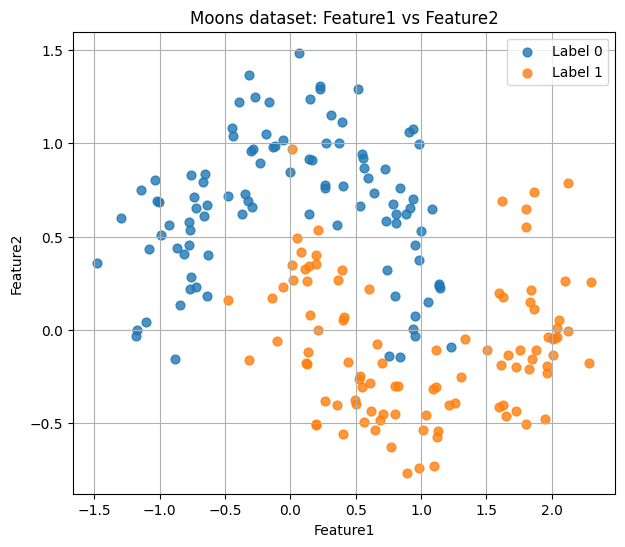

In [4]:
# scatter plot showing both features relating to the label
plt.figure(figsize=(7,6))
for label in df['Label'].unique():
    subset = df[df['Label'] == label]
    plt.scatter(subset['Feature1'], subset['Feature2'], label=f"Label {label}", s=40, alpha=0.8)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Moons dataset: Feature1 vs Feature2")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# separate features (X) and labels (y)
X = df[["Feature1", "Feature2"]]
y = df["Label"]

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# How SVM Works — Plain Language

## 1️⃣ Goal
SVM tries to separate classes in your data by drawing a line (or plane) that best splits them.  
- In 2D → a straight line  
- In 3D → a flat plane  
- Higher dimensions → a “hyperplane”

---

## 2️⃣ Margin
SVM doesn’t just pick any line — it picks the one that keeps the classes **as far apart as possible**.  
- The space between the line and the closest points of each class is called the **margin**.  
- Bigger margin = safer, more reliable predictions.

---

## 3️⃣ Support Vectors
Only a few points actually matter — the ones closest to the line. These are called **support vectors**.  
- Move or remove other points, and the line doesn’t change.  
- Support vectors “hold up” the line like corner posts.

---

## 4️⃣ Nonlinear Data (like moons)
Some data can’t be separated with a straight line.  
- SVM uses a **kernel trick** to “stretch” or “bend” the space so the classes can be separated by a line in this new space.  
- Common kernels:  
  - **Linear:** straight line  
  - **Polynomial:** slightly curved  
  - **RBF (Gaussian):** very flexible, smooth curves that wrap around complex shapes

---

## 5️⃣ Soft Margin
Real data isn’t perfect. SVM allows some points to be on the “wrong” side of the line.  
- The **C parameter** controls how much it tolerates mistakes:  
  - High C → fewer mistakes, smaller margin → risk of overfitting  
  - Low C → more mistakes allowed, bigger margin → better generalization

---

## TL;DR
Think of SVM like this:  
- Draw a fence between two groups.  
- Make the fence **as far as possible from the closest points** in each group.  
- Only the points right at the edges of the groups actually determine the fence.  
- If the groups are twisted or curved, SVM can **magically bend the space** to still put a straight fence between them.


In [6]:
from sklearn.svm import SVC

# setup SVM model with rbf kernel and fit data
svm = SVC(kernel='rbf', random_state=1)
svm.fit(X_train, y_train)

SVC(random_state=1)

In [7]:
# make predictions using SVM model with trained data
y_pred = svm.predict(X_test)

In [8]:
# now, use metrics to see how the model did: accuracy, confusion matrix, classification report; compare to y_test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy: tells how % of correct predictions
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc*100)

# confusion matrix: correctly labelled datapoints are top left and bottom right (true negative, true positive)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# classification report: shows precision, recall, f1-score, and support metrics
# precision: when my model predicts label 1 for ex, how often is it right? TP / (TP + FP)
# recall: of all the actual label 1s, how many did my model correctly label as 1? TP / (TP + FN)
# f1-score: how balanced is my model of correctly labelling TP and avoiding false alarms? (2 * ((precision * recall) / (precision + recall)))
# support: number of true predictions for each class
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

Accuracy:  100.0

Confusion Matrix:
 [[18  0]
 [ 0 22]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



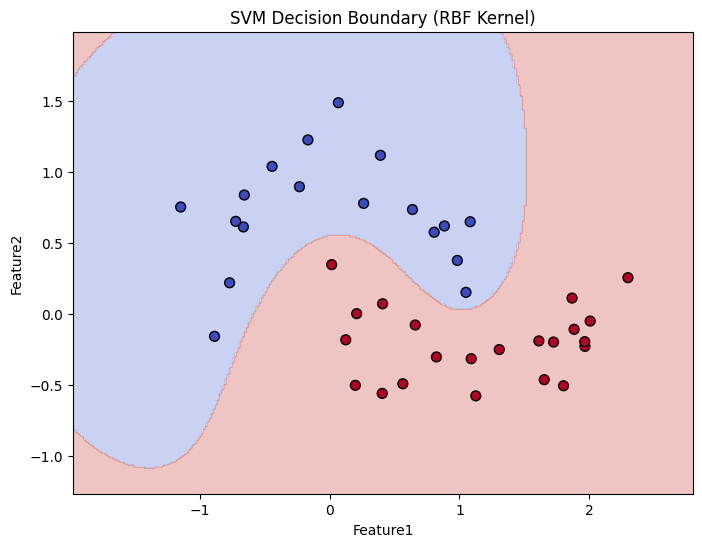

In [9]:
# since the numerical metrics look great, let's do a visualization as an additional metric
import numpy as np

# define a grid to evaluate the model over
x_min, x_max = X['Feature1'].min() - 0.5, X['Feature1'].max() + 0.5
y_min, y_max = X['Feature2'].min() - 0.5, X['Feature2'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# predict over the grid
grid = pd.DataFrame(
    np.c_[xx.ravel(), yy.ravel()],
    columns=["Feature1", "Feature2"]
)
Z = svm.predict(grid)
Z = Z.reshape(xx.shape)

# plot decision boundary and data points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, s=50, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# the colored regions show where the model predicts each class
# the boundary (curved line) is the SVM's decision boundary - where the model is exactly 50/50 between classes
# ideally, the test points should all fall in their respective regions

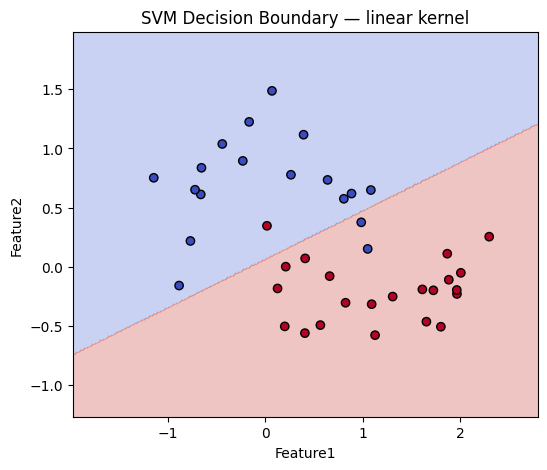

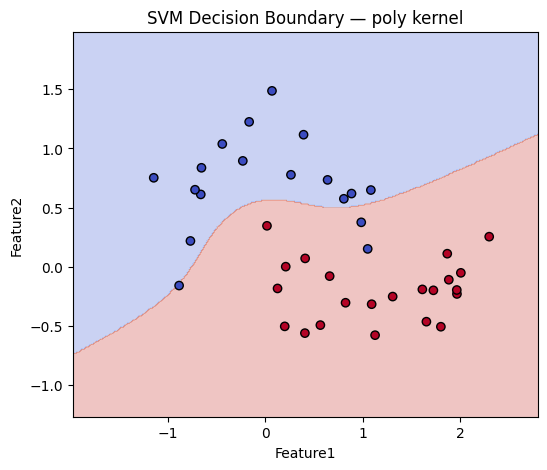

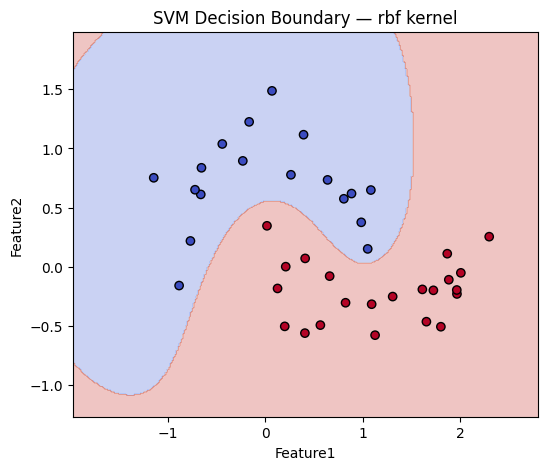

In [11]:
# compare different kernels to see why rbf was the best option for this dataset

for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel, random_state=1)
    model.fit(X_train, y_train)
    grid = pd.DataFrame(
      np.c_[xx.ravel(), yy.ravel()],
      columns=["Feature1", "Feature2"]
    )
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM Decision Boundary — {kernel} kernel")
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.show()

# notice how each kernel separates the data
# the linear kernel is best for linearly separable data which this dataset is not
# the poly kernal has issues with this dataset because you'd need a high-degree polynomial to properly trace the moons' shapes
# rbf is best for this data because is can bend as much as necessary - not too little like linear and not too much like a high-degree poly